In [14]:
# Import the modules
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure Seaborn is also imported
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [15]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = "C:/Users/nafis/Documents/UofT_Bootcamp_Work/credit-risk-classification/Credit_Risk/Resources/lending_data.csv"
df = pd.read_csv(file_path)

# Review the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [16]:
# Separate the data into labels and features

# Separate the y variable (labels)
y = df["loan_status"]

# Separate the X variable (features)
X = df.drop(columns=["loan_status"])

In [17]:
# Review the y variable Series
print(y.value_counts())  # Check the distribution of loan_status
print(y.head())          # Display the first few rows
print(y.shape)           # Check the shape of y

loan_status
0    75036
1     2500
Name: count, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64
(77536,)


In [18]:
# Review the X variable DataFrame
print(X.info())       # Check column types and missing values
print(X.describe())   # Summary statistics
print(X.head())       # Display the first few rows
print(X.shape)        # Check the shape of X (number of rows and columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 4.1 MB
None
          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [19]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model with random_state=1
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [21]:
# Make predictions using the testing data
y_pred = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [22]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

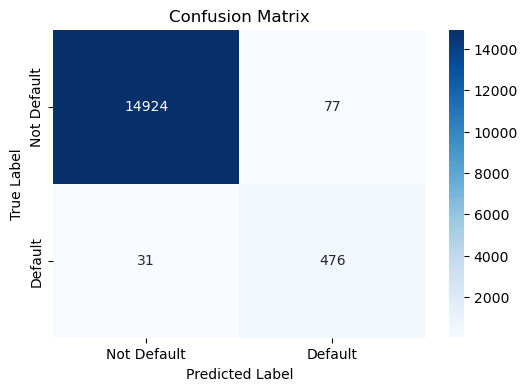

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Default", "Default"], yticklabels=["Not Default", "Default"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

The confusion matrix provides key insights into how well the Logistic Regression model classifies both healthy loans (0) and high-risk loans (1):

True Positives (476): The model correctly predicted 476 high-risk loans.
True Negatives (14,924): The model correctly predicted 14,924 healthy loans.
False Positives (77): The model incorrectly classified 77 healthy loans as high-risk.
False Negatives (31): The model incorrectly classified 31 high-risk loans as healthy.

Performance Analysis

Healthy Loan (0) Prediction Accuracy: The model performs exceptionally well in identifying healthy loans, as 14,924 out of 15,001 predictions for this category are correct.
High-Risk Loan (1) Prediction Accuracy: The model is less effective at detecting high-risk loans, with only 476 correctly identified out of 507 actual high-risk cases.
False Negative Concern: Since 31 high-risk loans were misclassified as healthy loans, there might be a risk of approving loans that should have been flagged.

Conclusion

The model is highly effective at detecting healthy loans, but it struggles somewhat with identifying high-risk loans. If the goal is to minimize false negatives (i.e., ensuring no high-risk loan is misclassified), further model improvements (such as using balanced datasets, feature engineering, or different algorithms like Random Forest) might be beneficial.

---